# seaborn color issue

We run into an issue when using seaborn to plot a categorical field that we want to treat as a number.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

For example, image we have 2 continuous vars, `x1` and `x2`, and a third variable, `group` whose value is a number, but really shouldn't be treated as a number, each number just indicates a distinct category. That is, group 2 is not "higher" than group 1.

In [2]:
np.random.seed(123)
df = pd.DataFrame({'x1': np.random.randn(100)})
df['x2'] = df.x1 + np.random.randn(100)
df['group'] = np.random.randint(1, 5, 100)
df.head()

,x1,x2,group
0,-1.085631,-0.443576,2
1,0.997345,-0.980542,3
2,0.282978,0.995243,4
3,-1.506295,1.092009,3
4,-0.578600,-0.603226,3


If we use seaborn's `hue` keyword argument with a scatter plot (or `relplot` or `regplot`):

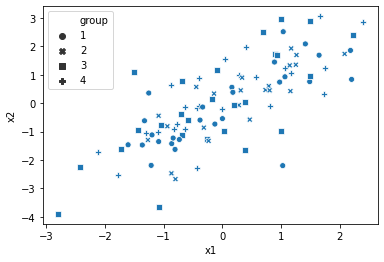

In [3]:
sns.scatterplot(data=df, x='x1', y='x2', style='group')

Seaborn tries to treat the `group` feature as a numerica variable and use color to indicate the magnitude of the `group` feature.

We can try to convert the `group` feature to a non-numeric type:

In [4]:
df.group = df.group.astype(str)
df.dtypes

x1       float64
x2       float64
group     object
dtype: object

And plot again:

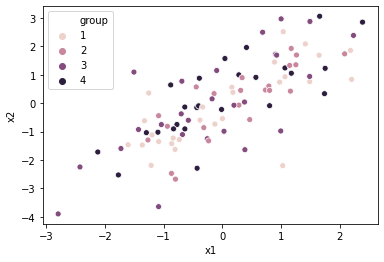

In [5]:
sns.scatterplot(data=df, x='x1', y='x2', hue='group')

But seaborn still treats `group` as a number.

The solve for this is to modify the `group` feature to be unambiguously a string so that seaborn can't interpret it as a number:

In [6]:
df.group = 'group ' + df.group.astype(str)

And now we'll correctly see `group` treated as a categorical feature.

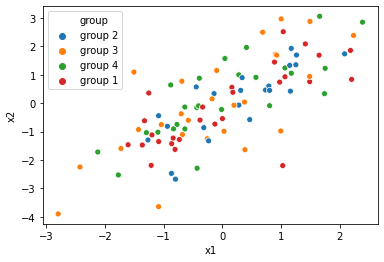

In [7]:
sns.scatterplot(data=df, x='x1', y='x2', hue='group')